In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/ratikpant'

In [6]:
df = pd.read_csv("/Users/ratikpant/desktop/portfolio practice/train.csv")


In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [29]:
#checking unique values in all of the columns
for col in df:
    print( col ,' - ',  df[col].nunique())

User_ID  -  5891
Product_ID  -  3631
Gender  -  2
Age  -  7
Occupation  -  21
City_Category  -  3
Stay_In_Current_City_Years  -  5
Marital_Status  -  2
Product_Category_1  -  20
Product_Category_2  -  17
Product_Category_3  -  15
Purchase  -  18105


In [35]:
#checking datatypes
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,550068.0,9.228379e+00,4.318496,2.0,8.0,8.0,14.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [36]:
#checking for missing values and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [48]:
df['Product_Category_2'].head(5)

0     NaN
1     6.0
2     NaN
3    14.0
4     NaN
Name: Product_Category_2, dtype: float64

In [49]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [65]:
#calculating the percentage of missing values in all columns
null_percentage = (df.isnull().sum() / len(df) * 100).round(2)
print(null_percentage)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64


In [66]:
#since product category 3 has highest, we will drop the product category3

df.drop('Product_Category_3', inplace = True, axis = 1)

In [67]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200


In [81]:
#converting product_category data type to int.
df['Product_Category_1'].astype(int)

0          3
1          1
2         12
3         12
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category_1, Length: 550068, dtype: int64

In [87]:
# treating missing values in product_id_ 2
#replacing them with the highest mode of that particular age group in product_id_2

mode = df.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)

for age in df["Age"].unique():
    age_mode = df.loc[df['Age'] == age ,'Product_Category_2'].fillna(mode[age])
    df.loc[df['Age']== age,'Product_Category_2'] = age_mode
    
#checking null values in product_id_2   

df['Product_Category_2'].isnull().sum()

0

In [88]:
#changing datatype to int
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

In [89]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Purchase                       int64
dtype: object

In [94]:
#checking the top 5 highest number of product_id sold during black friday sales

value_count = df['Product_ID'].value_counts()
top_5_productid = value_count.head(5)
print(top_5_productid)

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: count, dtype: int64


In [107]:
print()
print(df.isnull().sum())
print('-' * 50 )
print()
print(df.describe())


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64
--------------------------------------------------

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.

In [110]:
#checking for any duplicates
df.duplicated().sum()

0

<Axes: xlabel='Purchase', ylabel='Count'>

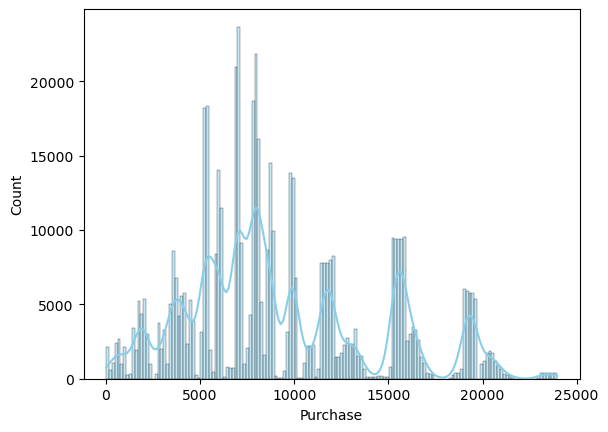

In [174]:
sns.histplot(df['Purchase']  , color = 'skyblue' , kde = True,)  


In [179]:
#checking for outliers in price and then evaluating price distribution

# Calculate quartiles and IQR
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#filter outliers
outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]

number_of_outliers = outliers.shape[0]

print(number_of_outliers)

2677


<Axes: ylabel='Purchase'>

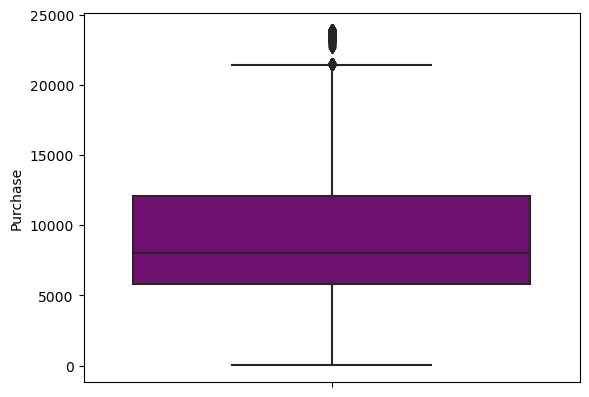

In [176]:
sns.boxplot(data = df , y = 'Purchase',  color='purple')

total number of customers bought 5891
total number of products sold 3631
--------------------------------------------------


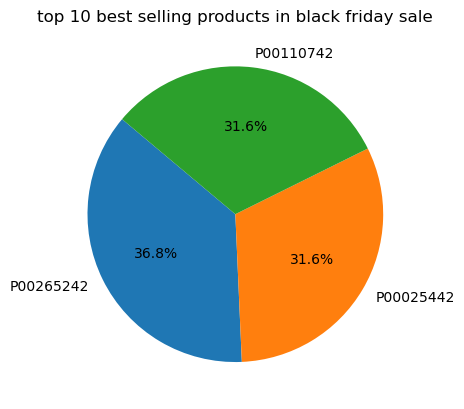

In [3]:
print('total number of customers bought', df.User_ID.nunique())
print('total number of products sold' , df.Product_ID.nunique())
print('-' * 50)

top_3_productid = df['Product_ID'].value_counts().head(3)
plt.pie(top_3_productid, labels = top_3_productid.index, autopct="%.1f%%", startangle=140 )
plt.title('top 10 best selling products in black friday sale')
plt.show()

In [201]:
df['Product_ID'].value_counts().head(3) 

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
Name: count, dtype: int64

# observations

# total number of unique customers  = 5891
# total number of unique products sold. = 3631
# top 3 products P00265242    1880
# P00025442    1615
# P00110742    1612

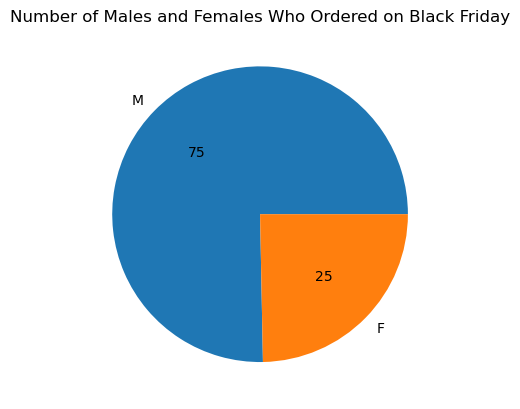

In [3]:
gender_Ratio = df['Gender'].value_counts()
plt.pie(gender_Ratio, labels=gender_Ratio.index, autopct = "%.f")
plt.title("Number of Males and Females Who Ordered on Black Friday")
plt.show()

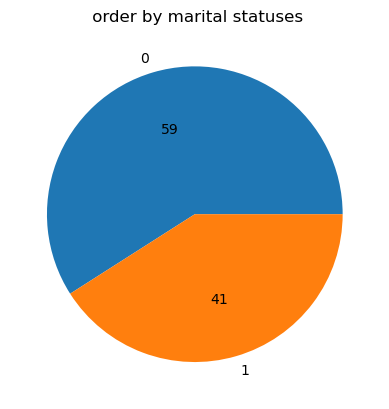

In [4]:
maritalstatus = df['Marital_Status'].value_counts()
plt.pie(maritalstatus , labels =  maritalstatus.index , autopct= "%.f" )
plt.title(" order by marital statuses")
plt.show()

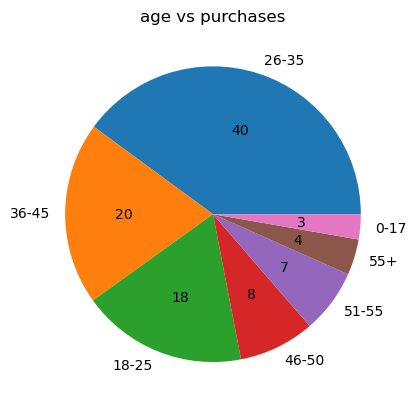

In [20]:

plt.pie(df['Age'].value_counts(), labels = df['Age'].value_counts().index, autopct = "%.f")
plt.title("age vs purchases")
plt.show()
#78% percent of sales comes from the age group 18-45


Text(0, 0.5, 'number of purchase')

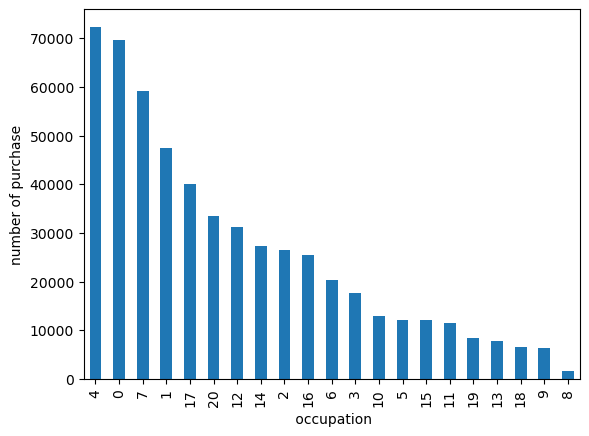

In [16]:
df['Occupation'].value_counts().plot(kind='bar')
plt.xlabel(" occupation")
plt.ylabel("number of purchase")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [26]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [31]:
print("Most number of products bought by any user:",
      (df.groupby("User_ID")["Product_ID"].nunique().sort_values(ascending = False).head(3)))

Most number of products bought by any user: User_ID
1001680    1026
1004277     979
1001941     898
Name: Product_ID, dtype: int64


In [39]:
print("most purchases by age group" , 
      df.groupby("User_ID")["Purchase"].sum().sort_values(ascending = False).head(3))

most purchases by age group User_ID
1004277    10536909
1001680     8699596
1002909     7577756
Name: Purchase, dtype: int64


In [35]:
print("most purchases by age group" , 
      df.groupby("Product_ID")["Age"].nunique().sort_values(ascending = False).head(3))

most purchases by age group Product_ID
P00000142    7
P00210042    7
P00210442    7
Name: Age, dtype: int64


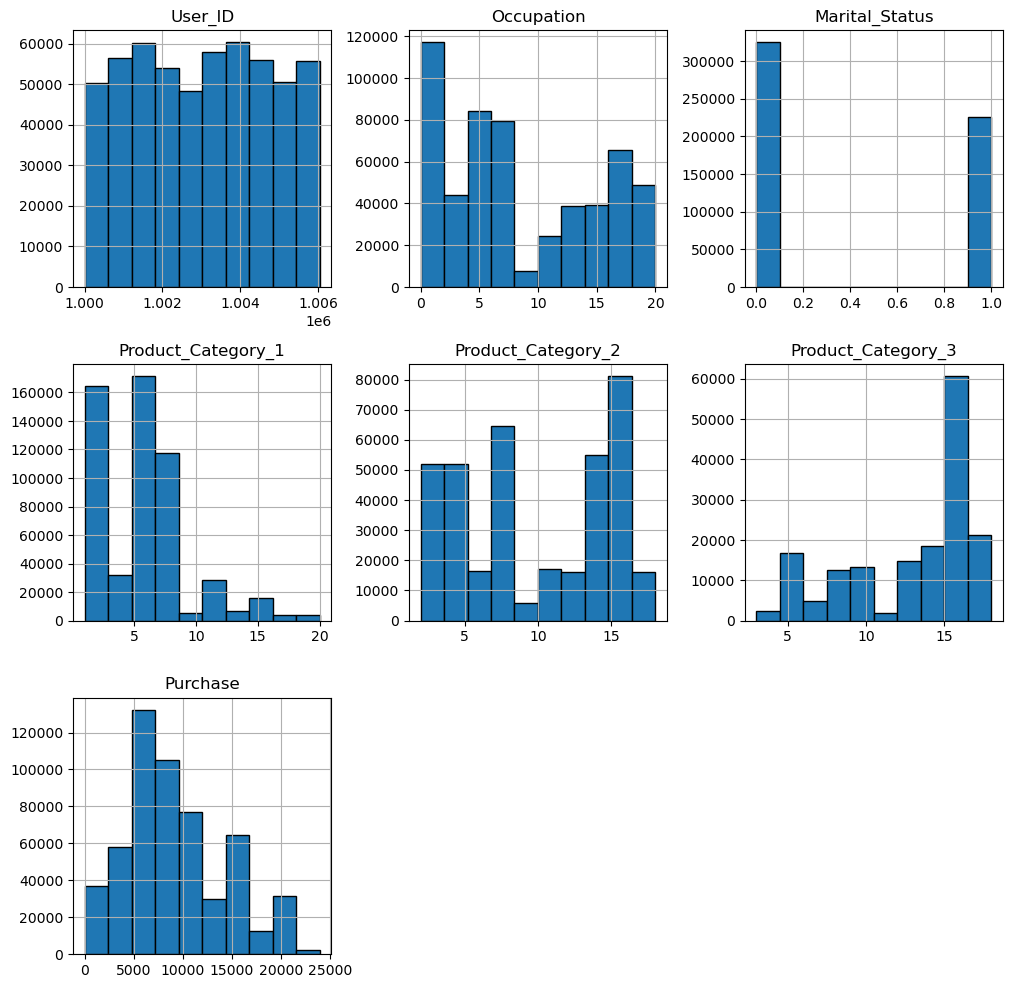

In [7]:
df.hist(edgecolor='black',figsize=(12,12));

In [8]:
df.duplicated().sum()

0

Purchase
7011    191
7193    188
6855    187
Name: count, dtype: int64

In [16]:
df.shape

(550068, 12)

In [23]:
df['Occupation'].value_counts().head(3)

Occupation
4    72308
0    69638
7    59133
Name: count, dtype: int64

In [ ]:
#top 3 occupation that are spending.

In [28]:


top_occupation = df.groupby('Occupation')['Purchase'].sum().sort_values(ascending = False).head(3)
print('top 3 occupation by most spends are :', top_occupation  )

top 3 occupation by most spends are : Occupation
4    666244484
0    635406958
7    557371587
Name: Purchase, dtype: int64


In [25]:
df['Purchase'].sum()

5095812742

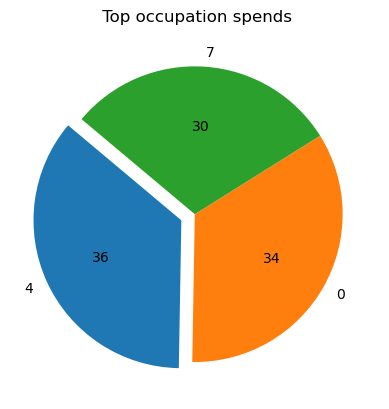

In [35]:
plt.pie( top_occupation, labels = top_occupation.index, autopct = '%.f', startangle = 140, explode = (0.1,0,0))
plt.title(' Top occupation spends')
plt.show()